<a href="https://colab.research.google.com/github/sompattanaik/Data-Science/blob/main/multi_linear_regression_MPG_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [ ]:
cars = pd.read_csv("Cars (1).csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [ ]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


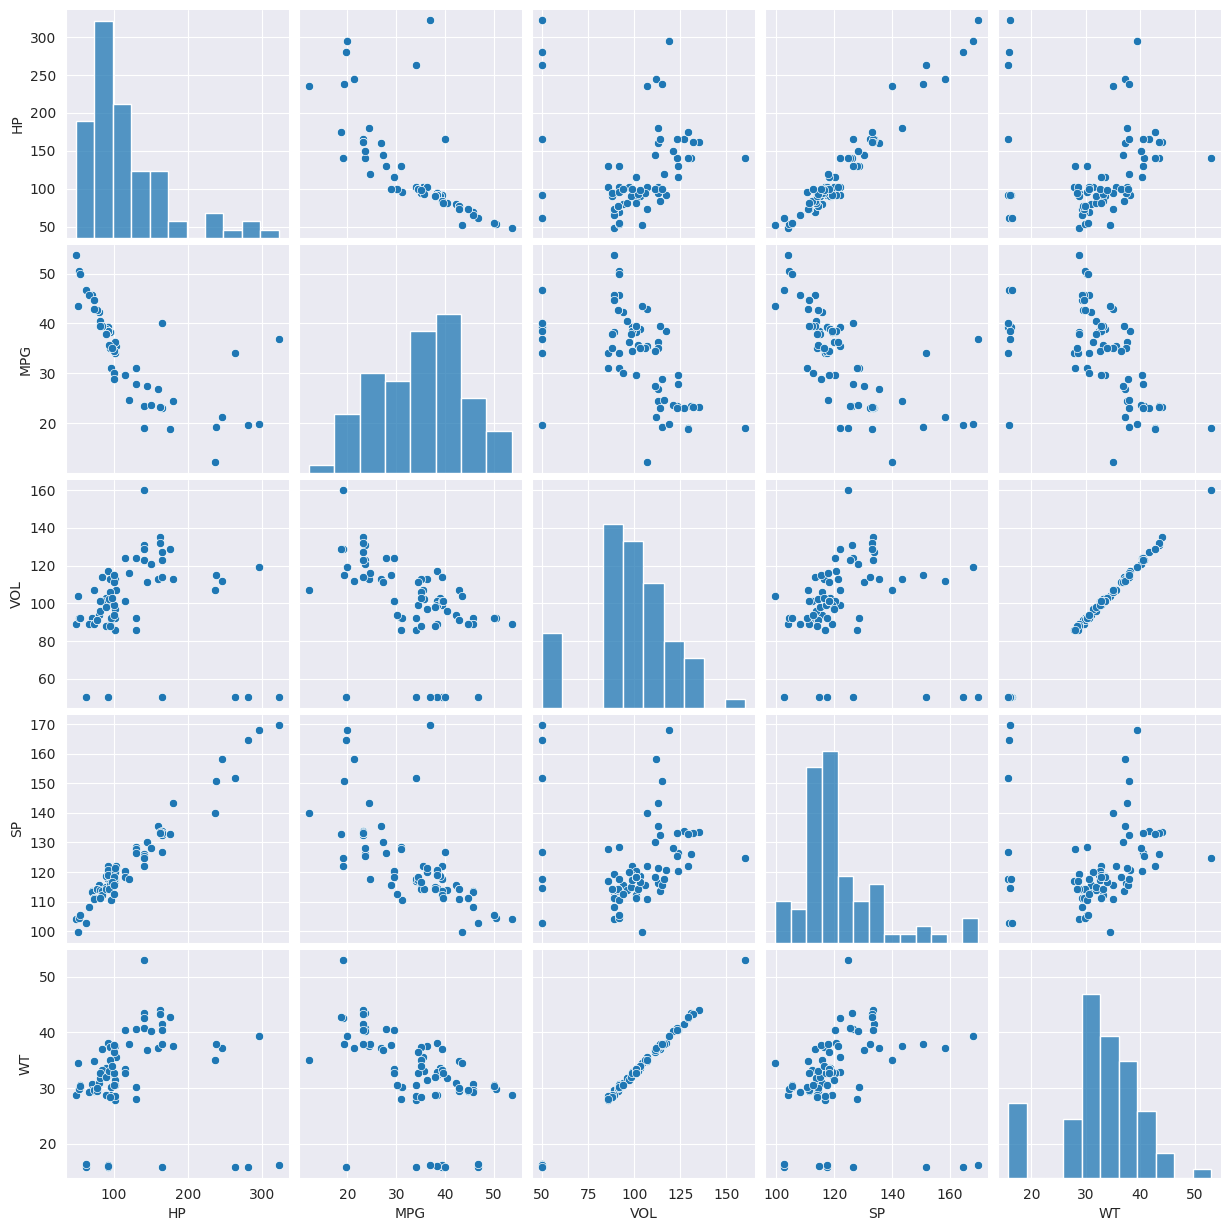

In [ ]:
sns.pairplot(cars)

Text(0, 0.5, 'Top SPeed')

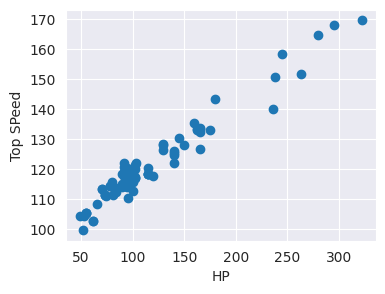

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(cars.HP,cars.SP)
plt.xlabel('HP')
plt.ylabel('Top SPeed')

Text(0, 0.5, 'Miles per Gallon')

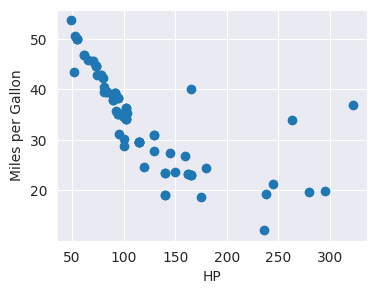

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(cars.HP,cars.MPG);
plt.xlabel('HP')
plt.ylabel('Miles per Gallon')

**As we all know more the horse power lesser the mileage**


Text(0.5, 0, 'MILEAGE (MPG)')

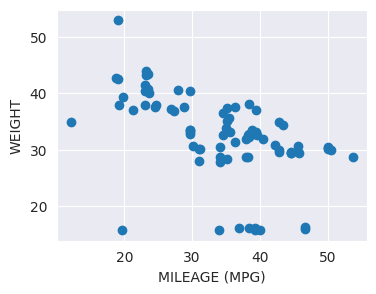

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(cars.MPG,cars.WT)
plt.ylabel('WEIGHT')
plt.xlabel('MILEAGE (MPG)')

Text(0, 0.5, 'WEIGHT')

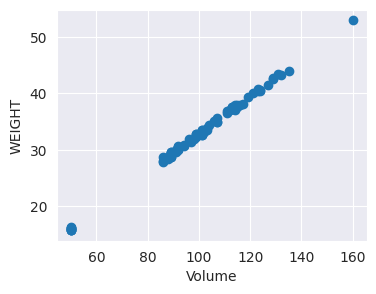

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(cars.VOL,cars.WT)
plt.xlabel('Volume')
plt.ylabel('WEIGHT')

We can see that Volume and Wight are strongly correlated.

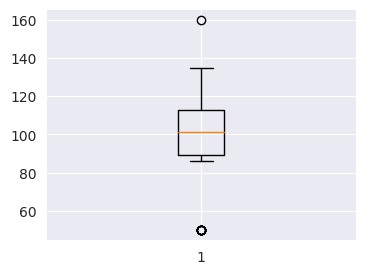

In [ ]:
plt.figure(figsize=(4,3))
plt.boxplot(cars.VOL);

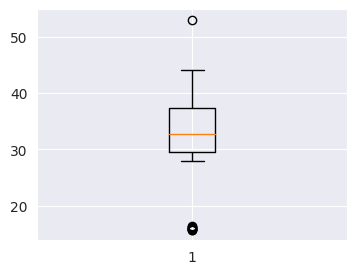

In [ ]:
plt.figure(figsize=(4,3))
plt.boxplot(cars.WT);

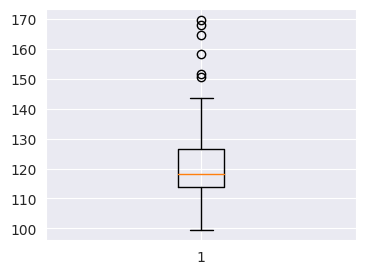

In [ ]:
plt.figure(figsize=(4,3))
plt.boxplot(cars.SP);

So some of the independent variable are having outliers.

In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
!pip install statsmodels

Weight and Volume are having a strong correlation i.e. 0.999.

In [ ]:
import statsmodels.formula.api as smf
model_all = smf.ols('MPG~VOL+WT+HP+SP',data = cars).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.54e-23
Time:                        10:15:10   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here if we take only VOLUME to build a model then we

In [ ]:
print(model_all.tvalues, model_all.pvalues)

Intercept    2.058841
VOL         -0.590970
WT           0.236541
HP          -5.238735
SP           2.499880
dtype: float64 Intercept    0.042936
VOL          0.556294
WT           0.813649
HP           0.000001
SP           0.014579
dtype: float64


So wight and volume are having the  p-value more than 0.05. So we cansay that they are insignificant for the model. But now we'll see if individually they are significant or not.

In [ ]:
model_vol = smf.ols('MPG~VOL',data = cars).fit()
model_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.82e-07
Time:                        10:15:10   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the p-value of VOLUME is less than 0.05. so it turns out to be a significant feature.

In [ ]:
model_wt = smf.ols('MPG~WT',data = cars).fit()
model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.38e-07
Time:                        10:15:10   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the p-value of WEIGHT is also less than 0.05. so it turns out to be a significant feature.

[57]
0s


In [ ]:
model_wt_vol = smf.ols('MPG~VOL+WT',data = cars).fit()
model_wt_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.43e-06
Time:                        10:15:11   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**But here if we are building model by taking both WEIGHT and VOLUME together then they are acting like insignificant. their p-value is greater than 0.05. SO we have to fix it.**

***Now to fix this issue of multicolinearity we are gonna appl VIF.***

In [ ]:
## Apply vif on weight

In [ ]:
rsq_wt = smf.ols('WT~SP+HP+VOL',data = cars).fit().rsquared

In [ ]:
vif_wt = 1/(1-rsq_wt)
vif_wt

639.5338175572624

In [ ]:
# Now apply vif on volume
rsq_vol = smf.ols('VOL~SP+HP+WT',data = cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
vif_vol

638.8060836592878

**So VIF of WT >VIF of VOL, so VOL is a better feature than WT**

In [ ]:
d1 = {'variables':['WT','VOL'],'VIF':[vif_wt,vif_vol]}
vif = pd.DataFrame(d1)
vif

,variables,VIF
0,WT,639.533818
1,VOL,638.806084


# **Residual analysis.**

**PLOTTING Q-Q Plot**

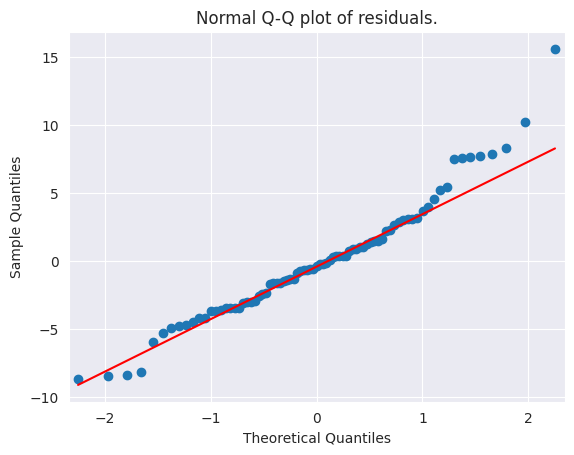

In [ ]:
import statsmodels.api as sm
qqplot = sm.qqplot(model_all.resid, line='q')
plt.title("Normal Q-Q plot of residuals.")
plt.show()

The observations which are away from the red line are outliers.

# Residual Plot to check HOMOSCEDASTICITY.

Text(0, 0.5, 'standardized residual values')

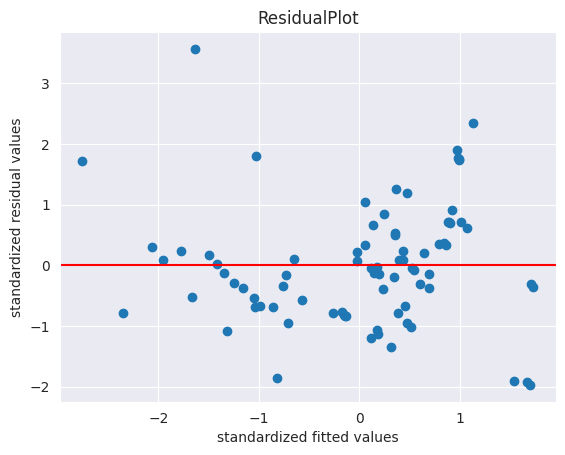

In [ ]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model_all.fittedvalues),get_standardized_values(model_all.resid))
plt.axhline(y=0, c ='r')
plt.title('ResidualPlot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')

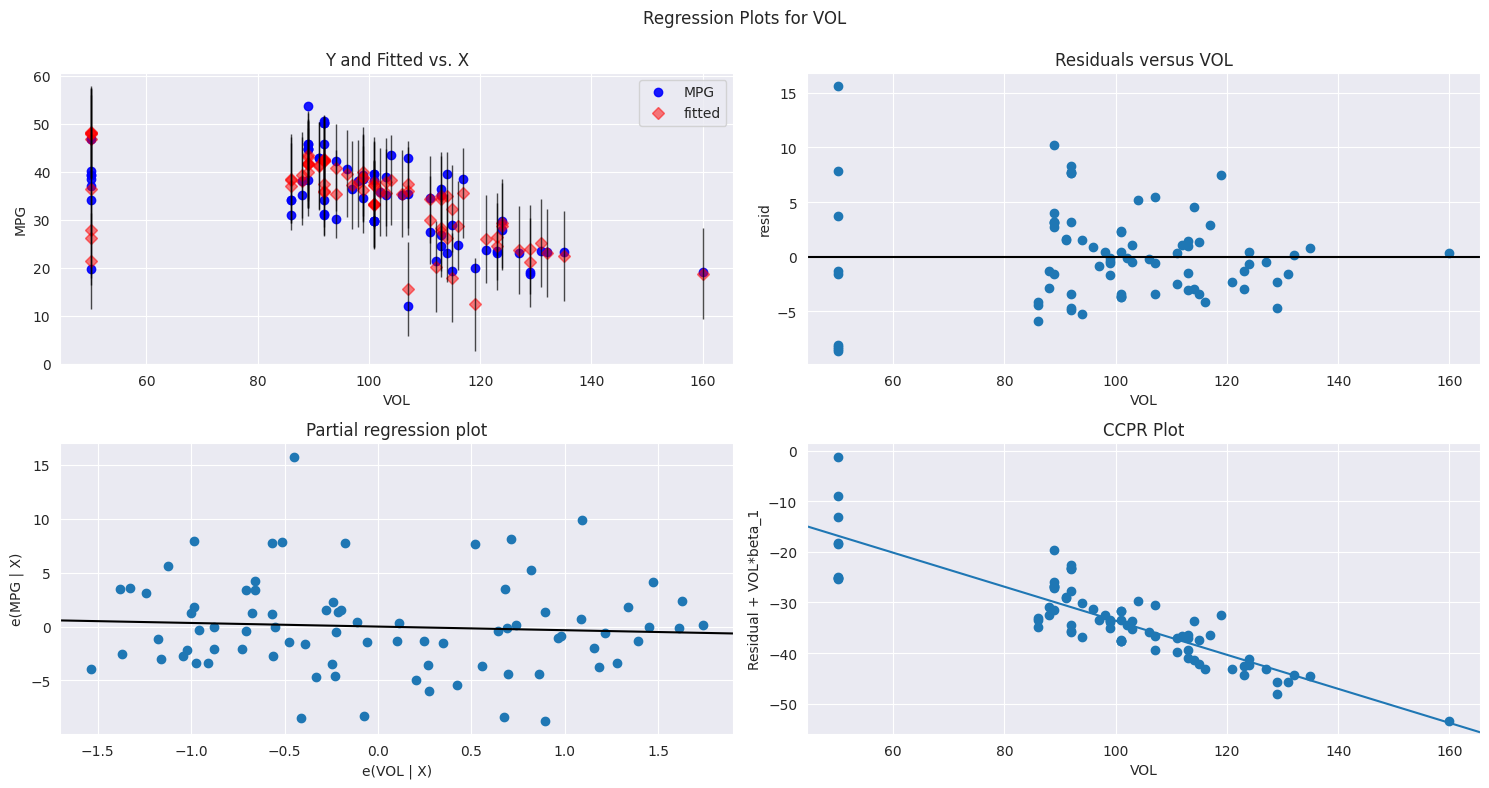

In [ ]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model_all,'VOL',fig=fig)

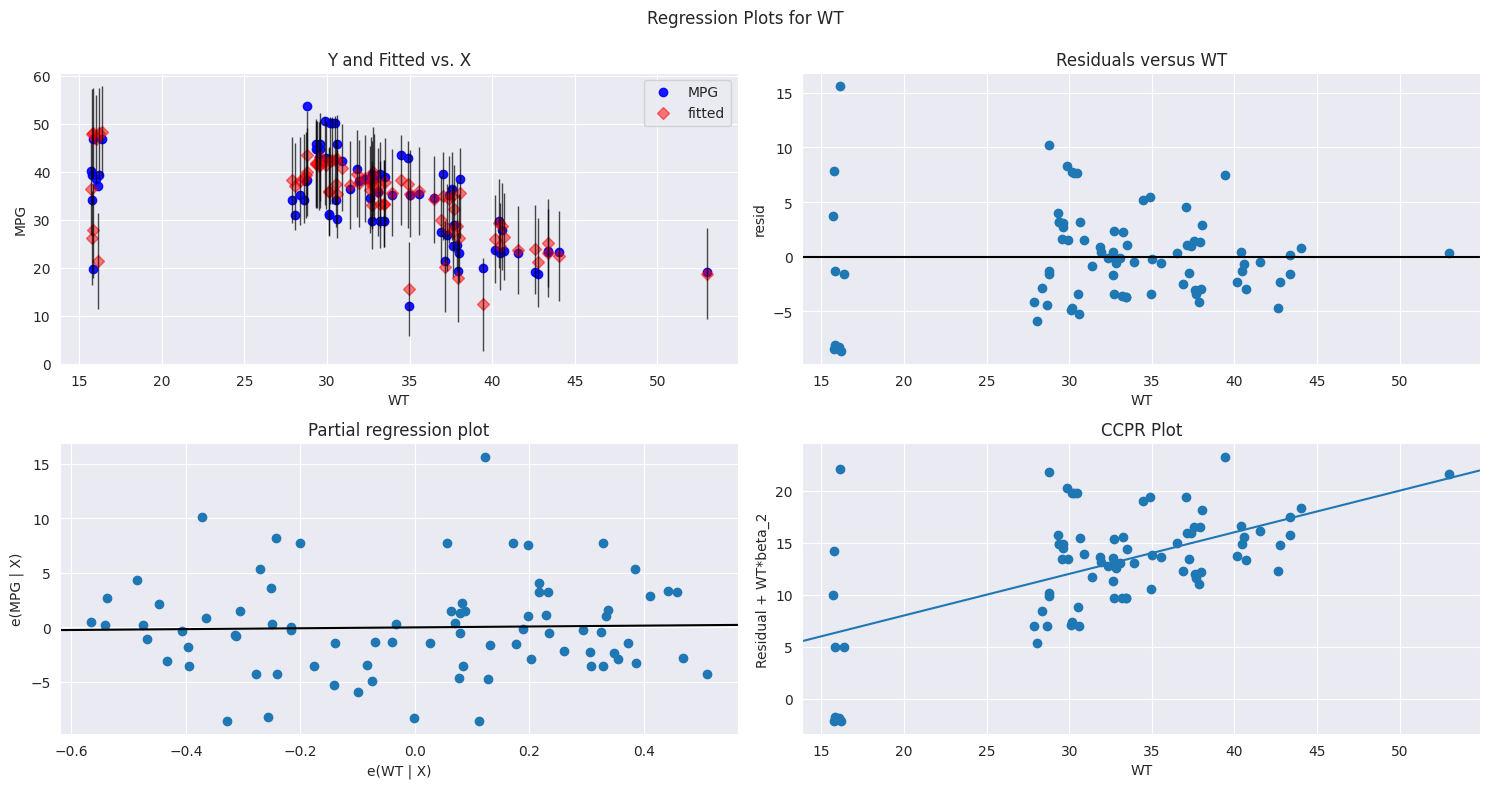

In [ ]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model_all,'WT',fig=fig)

In [ ]:
model_influence = model_all.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, "Cook's distance")

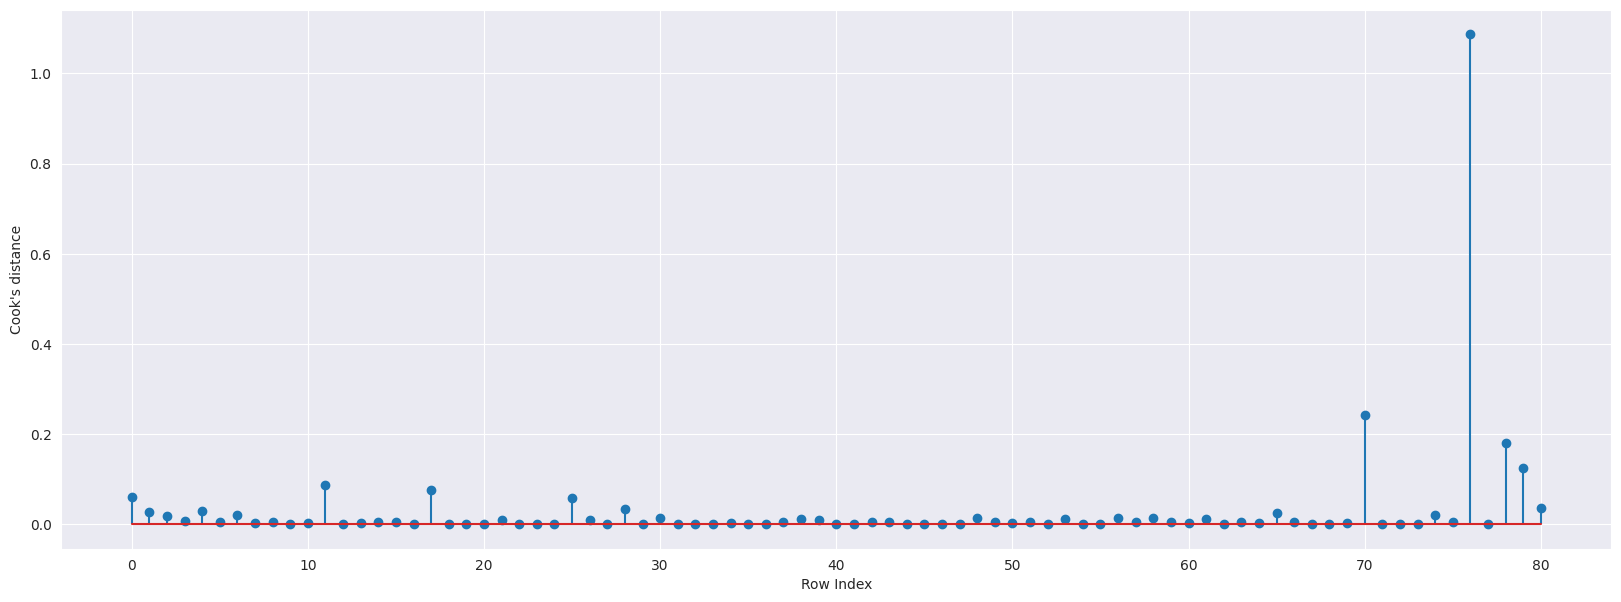

In [ ]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's distance")

In [ ]:
(np.argmax(c))

76

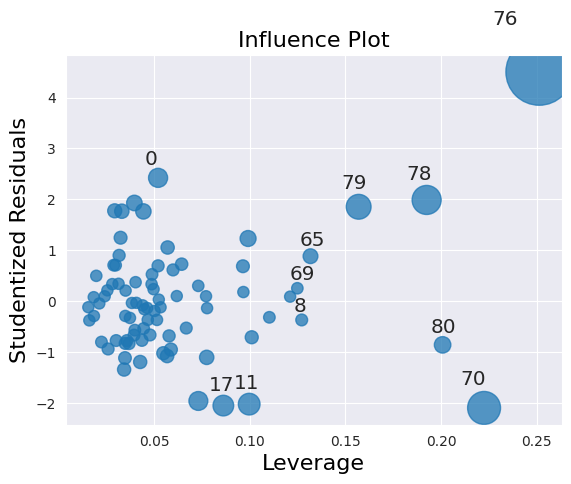

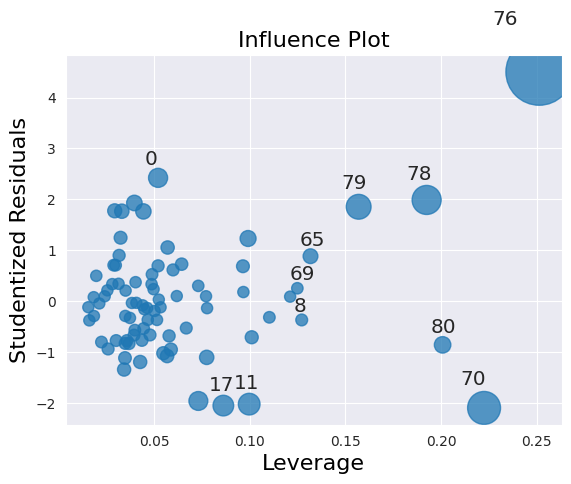

In [ ]:
##Plotting influence plot

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_all)

In [ ]:
cars2 = cars.drop(cars.index[[76]],axis = 0)
cars2.shape

(80, 5)

In [ ]:
cars.shape

(81, 5)

In [ ]:
cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
cars3 = cars2.reset_index()
cars3.tail()

,index,HP,MPG,VOL,SP,WT
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099
79,80,236,12.101263,107,139.840817,34.948615


In [ ]:
cars4 = cars3.drop(['index'],axis = 1)

In [ ]:
cars.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
final_model = smf.ols('MPG~VOL+SP+HP',data= cars4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.78e-28
Time:                        10:53:01   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_influence_v = final_model.get_influence()

In [ ]:
model_influence_v

In [ ]:
(c_v,_) = model_influence_v.cooks_distance

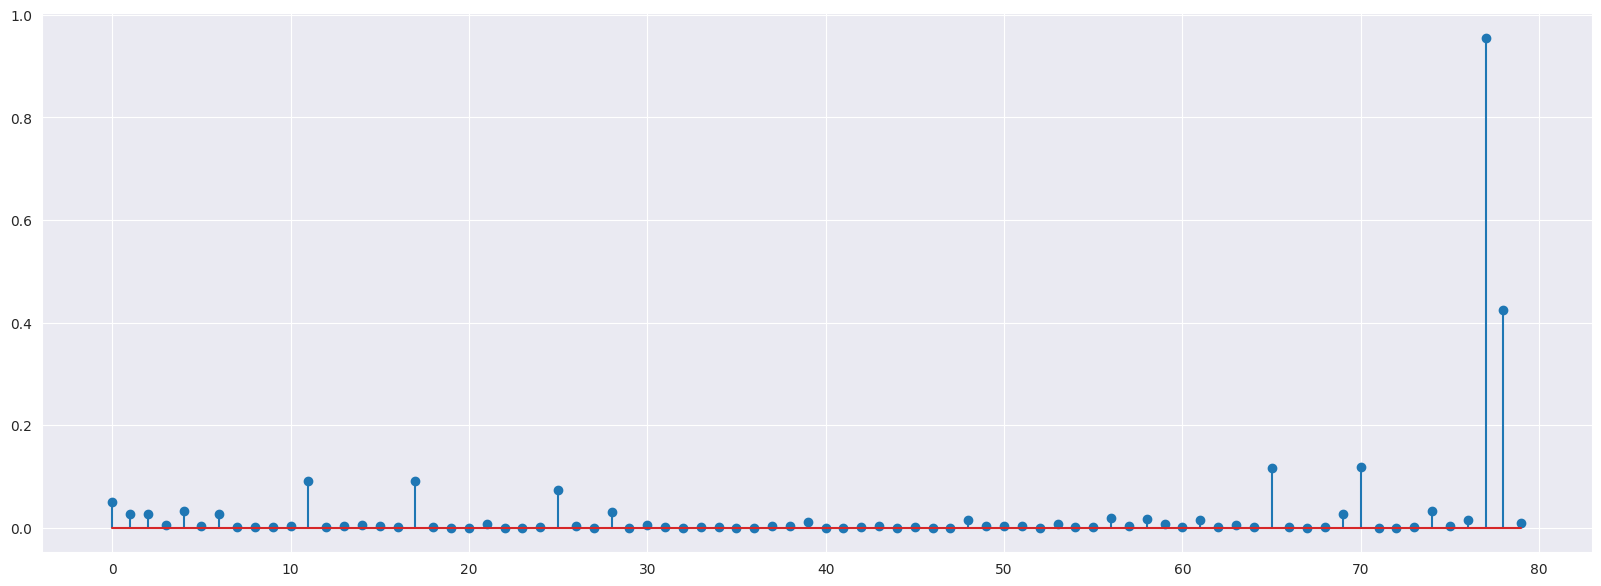

In [ ]:
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars4)),np.round(c_v,3));

In [ ]:
np.argmax(c_v)

77

In [ ]:
np.max(c_v)

0.9548691936312454

In [ ]:
cars5 = cars4.drop(cars4.index[[77]],axis = 0)
cars5

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
78,295,19.833733,119,167.944460,39.423099


In [ ]:
cars6 = cars5.reset_index()

In [ ]:
cars6.tail()

,index,HP,MPG,VOL,SP,WT
74,74,140,19.086341,129,121.864163,42.618698
75,75,175,18.762837,129,132.864163,42.778219
76,76,238,19.197888,115,150.576579,37.923113
77,78,295,19.833733,119,167.944460,39.423099
78,79,236,12.101263,107,139.840817,34.948615


In [ ]:
cars7 = cars6.drop(['index'],axis=1)
cars7.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
fin_ml = smf.ols("MPG~HP+SP+VOL",data=cars7).fit()
fin_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.43e-30
Time:                        11:10:55   Log-Likelihood:                -212.93
No. Observations:                  79   AIC:                             433.9
Df Residuals:                      75   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6539     12.182      1.531      0.130      -5.613      42.921
HP            -0.2600      0.033     -7.808      0.000      -0.326      -0.194
SP             0.4964      0.130      3.804      0.000       0.236       0.756
VOL           -0.1471      0.021     -7.105      0.000      -0.188      -0.106
==============================================================================
Omnibus:                       14.094   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.575
Skew:                           0.942   Prob(JB):                     0.000415
Kurtosis:                       4.086   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_inf = fin_ml.get_influence()
(c_f,_) = model_inf.cooks_distance

<StemContainer object of 3 artists>

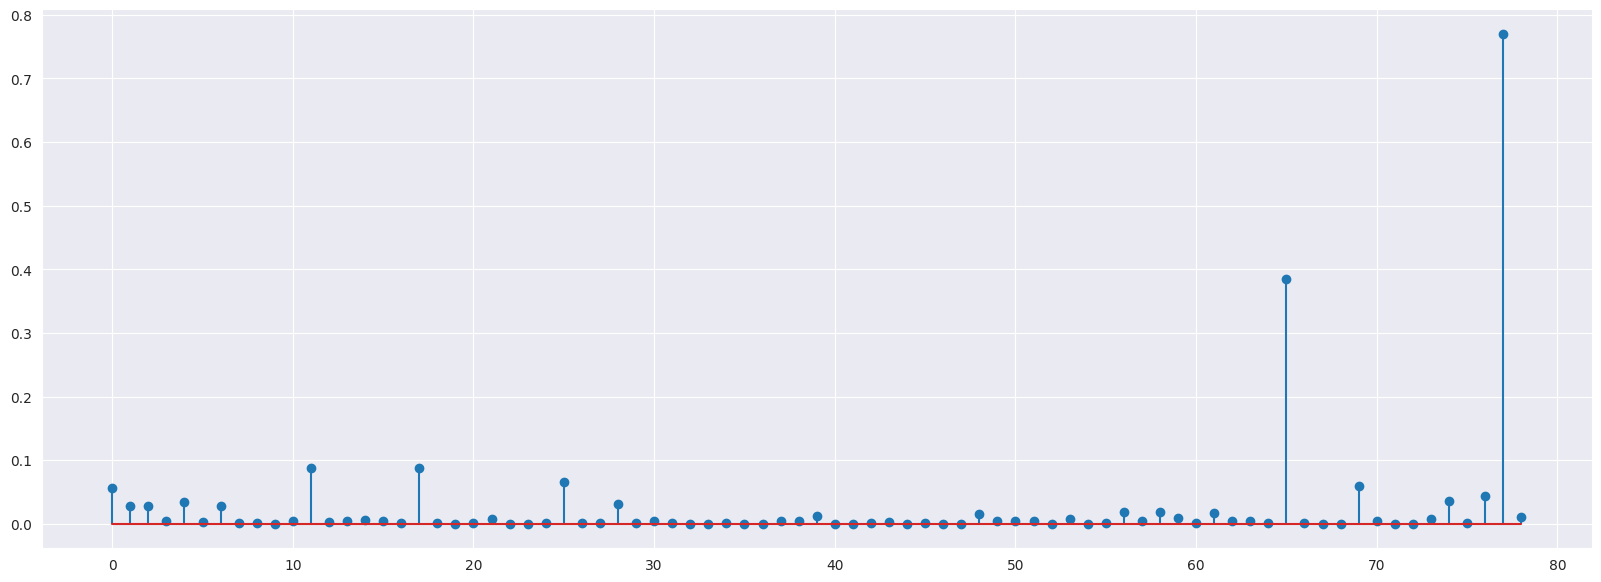

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c_f,3))


**Our model is ready because there is no outliear....**
**Now we will predict the MPG using some new data**

In [ ]:
new_data_frame = pd.DataFrame({'HP':40,"VOL":95,"SP":102.864163},index = [1])


In [ ]:
new_data_frame

,HP,VOL,SP
1,40,95,121.864163


In [ ]:
fin_ml.predict(new_data_frame)

1    54.776535
dtype: float64

In [ ]:
new_data2 = pd.DataFrame({'HP':140,"VOL":129,"SP":121.864163},index = [1])

In [ ]:
fin_ml.predict(new_data2)

1    23.771335
dtype: float64